In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
spec = pd.read_csv('C:/data/user_spec.csv')

In [4]:
loan = pd.read_csv('C:/data/loan_result.csv')

In [5]:
spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.00000,1.00000,2022-06-07 06:28:18,660.00000,108000000.00000,PRIVATEBUSINESS,20151101.00000,기타,자가,1000000.00000,기타,0.00000,NaN,4.00000,162000000.00000
1,954900,553686,1968.00000,1.00000,2022-06-07 14:29:03,870.00000,30000000.00000,PRIVATEBUSINESS,20070201.00000,정규직,기타가족소유,30000000.00000,대환대출,0.00000,NaN,1.00000,27000000.00000
2,137274,59516,1997.00000,1.00000,2022-06-07 21:40:22,710.00000,30000000.00000,FREELANCER,20210901.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,15000000.00000
3,1570936,167320,1989.00000,1.00000,2022-06-07 09:40:27,820.00000,62000000.00000,EARNEDINCOME,20170101.00000,정규직,자가,2000000.00000,생활비,0.00000,NaN,7.00000,344000000.00000
4,967833,33400,2000.00000,1.00000,2022-06-07 08:55:07,630.00000,36000000.00000,EARNEDINCOME,20210901.00000,정규직,기타가족소유,5000000.00000,생활비,0.00000,0.00000,1.00000,16000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.00000,1.00000,2022-03-22 14:55:32,590.00000,25000000.00000,FREELANCER,202106.00000,기타,기타가족소유,5000000.00000,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.00000,1.00000,2022-03-22 01:19:24,980.00000,20000000.00000,OTHERINCOME,NaN,기타,자가,50000000.00000,생활비,NaN,NaN,1.00000,NaN
1394213,1319606,173524,1983.00000,1.00000,2022-03-22 07:34:32,750.00000,75000000.00000,EARNEDINCOME,200908.00000,정규직,자가,100000000.00000,대환대출,NaN,NaN,8.00000,200000000.00000
1394214,1482466,766546,1975.00000,1.00000,2022-03-22 22:12:35,640.00000,50000000.00000,EARNEDINCOME,201705.00000,정규직,자가,10000000.00000,대환대출,NaN,NaN,10.00000,117000000.00000


# insert_time 변환

In [6]:
spec['insert_time'] = pd.to_datetime(spec['insert_time'],format='%Y-%m-%d %H:%M:%S' )

In [7]:
spec['Month'] = spec['insert_time'].dt.strftime('%m')

In [8]:
spec = spec.sort_values(by='insert_time')
spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month
543548,566528,681184,1974.00000,1.00000,2022-03-01 00:11:35,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03
736347,180433,623737,1997.00000,1.00000,2022-03-01 00:12:05,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03
635154,1657888,752985,1997.00000,1.00000,2022-03-01 00:12:06,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03
1257424,672433,231989,1978.00000,0.00000,2022-03-01 00:12:10,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03
136075,2136071,622446,1986.00000,1.00000,2022-03-01 00:12:10,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202233,717881,649046,1989.00000,1.00000,2022-06-30 23:56:41,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06
209259,118253,668486,1958.00000,0.00000,2022-06-30 23:56:56,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06
505495,725612,361690,1979.00000,1.00000,2022-06-30 23:57:39,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06
736587,1662439,258755,1994.00000,1.00000,2022-06-30 23:58:09,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06


# 기존 유저 데이터 정보로 결측 일부 보간

In [13]:
spec_gb = spec.groupby(['user_id'])[['birth_year', 'gender']].agg(max)
spec_gb

,birth_year,gender
user_id,,
1,2000.00000,1.00000
7,1985.00000,1.00000
9,1996.00000,1.00000
11,1997.00000,1.00000
12,1991.00000,1.00000
...,...,...
879693,2001.00000,0.00000
879694,1991.00000,0.00000
879695,1996.00000,1.00000


In [14]:
spec_gb = spec_gb.reset_index()
spec_gb = spec_gb.reset_index(drop=True)

In [15]:
spec_gb

,user_id,birth_year,gender
0,1,2000.00000,1.00000
1,7,1985.00000,1.00000
2,9,1996.00000,1.00000
3,11,1997.00000,1.00000
4,12,1991.00000,1.00000
...,...,...,...
405208,879693,2001.00000,0.00000
405209,879694,1991.00000,0.00000
405210,879695,1996.00000,1.00000
405211,879696,1997.00000,1.00000


In [16]:
spec = pd.merge(left=spec, right=spec_gb, how='left', on=['user_id'])
spec

,application_id,user_id,birth_year_x,gender_x,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year_y,gender_y
0,566528,681184,1974.00000,1.00000,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,...,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000
1,180433,623737,1997.00000,1.00000,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,...,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000
2,1657888,752985,1997.00000,1.00000,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,...,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000
3,672433,231989,1978.00000,0.00000,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,...,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000
4,2136071,622446,1986.00000,1.00000,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,...,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,1989.00000,1.00000,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,...,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000
1394212,118253,668486,1958.00000,0.00000,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,...,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000
1394213,725612,361690,1979.00000,1.00000,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,...,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000
1394214,1662439,258755,1994.00000,1.00000,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,...,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000


In [17]:
spec = spec.drop(['birth_year_x', 'gender_x'], axis=1)

In [18]:
spec = spec.rename(columns = {'birth_year_y': 'birth_year'})

In [19]:
spec = spec.rename(columns = {'gender_y':'gender'})

In [20]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
Month                                        0
app_count                                    0
birth_year                                9724
gender                                    9724
dtype: int64

In [21]:
spec_sc = spec[spec['credit_score'].isnull()]

In [22]:
spec_sc_id = spec_sc['user_id'].unique()

In [23]:
spec_sc_id = pd.DataFrame(data = spec_sc_id, columns= ['user_id'])

In [24]:
spec_sc_id

,user_id
0,277702
1,140973
2,211994
3,866618
4,351557
...,...
74627,794458
74628,291642
74629,413213
74630,10674


In [25]:
spec_user = spec[spec['user_id']==259924]

In [26]:
spec_user

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender
8203,1899941,259924,20220301,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,1,1951.00000,0.00000
28556,339865,259924,20220303,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,2,1951.00000,0.00000
44738,1073322,259924,20220304,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,3,1951.00000,0.00000
48879,72566,259924,20220305,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,4,1951.00000,0.00000
54232,2103602,259924,20220306,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,5,1951.00000,0.00000
66152,2163789,259924,20220307,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,6,1951.00000,0.00000
72658,140297,259924,20220308,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,7,1951.00000,0.00000
83035,1681389,259924,20220308,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,8,1951.00000,0.00000
88235,60144,259924,20220309,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,9,1951.00000,0.00000
106244,768717,259924,20220311,NaN,20000000.00000,OTHERINCOME,NaN,기타,자가,10000000.00000,LIVING,NaN,NaN,8.00000,29000000.00000,03,10,1951.00000,0.00000


In [27]:
spec_credit = spec.groupby(['user_id'])[['credit_score']].mean()
spec_credit

,credit_score
user_id,
1,750.00000
7,580.00000
9,810.00000
11,662.50000
12,482.14286
...,...
879693,668.00000
879694,NaN
879695,NaN


In [28]:
spec_credit = spec_credit.reset_index()
spec_credit = spec_credit.reset_index(drop=True)

In [29]:
spec_credit

,user_id,credit_score
0,1,750.00000
1,7,580.00000
2,9,810.00000
3,11,662.50000
4,12,482.14286
...,...,...
405208,879693,668.00000
405209,879694,NaN
405210,879695,NaN
405211,879696,610.00000


In [30]:
spec_credit_1 = pd.merge(left=spec_sc_id, right=spec_credit, how='left', on=['user_id'])
spec_credit_1

,user_id,credit_score
0,277702,510.00000
1,140973,700.00000
2,211994,860.00000
3,866618,NaN
4,351557,662.50000
...,...,...
74627,794458,NaN
74628,291642,NaN
74629,413213,NaN
74630,10674,NaN


In [31]:
spec_credit_1.isnull().sum()

user_id             0
credit_score    63710
dtype: int64

In [32]:
spec_credit_1 = spec_credit_1.rename(columns = {'credit_score': 'credit_score_nan'})

In [33]:
spec_credit_1

,user_id,credit_score_nan
0,277702,510.00000
1,140973,700.00000
2,211994,860.00000
3,866618,NaN
4,351557,662.50000
...,...,...
74627,794458,NaN
74628,291642,NaN
74629,413213,NaN
74630,10674,NaN


In [34]:
spec = pd.merge(left=spec,right=spec_credit_1, how='left', on=['user_id'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,credit_score_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,NaN
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,NaN
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,NaN
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,NaN
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,NaN
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,NaN
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,NaN
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,NaN


In [35]:
spec['credit_score'] = spec['credit_score'].fillna(spec['credit_score_nan'])

In [36]:
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,credit_score_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,NaN
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,NaN
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,NaN
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,NaN
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,NaN
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,NaN
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,NaN
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,NaN


In [37]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87524
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
Month                                        0
app_count                                    0
birth_year                                9724
gender                                    9724
credit_score_nan                       1337834
dtype: int64

In [38]:
spec = spec.drop(['credit_score_nan'], axis=1)

In [39]:
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000


In [40]:
spec_loan_cnt = spec.groupby(['user_id'])[['existing_loan_cnt']].mean()
spec_loan_cnt

,existing_loan_cnt
user_id,
1,1.00000
7,7.00000
9,1.00000
11,1.00000
12,5.00000
...,...
879693,3.00000
879694,NaN
879695,NaN


In [41]:
spec_loan_cnt = spec_loan_cnt.reset_index()
spec_loan_cnt = spec_loan_cnt.reset_index(drop=True)
spec_loan_cnt

,user_id,existing_loan_cnt
0,1,1.00000
1,7,7.00000
2,9,1.00000
3,11,1.00000
4,12,5.00000
...,...,...
405208,879693,3.00000
405209,879694,NaN
405210,879695,NaN
405211,879696,3.00000


In [42]:
spec_loan_cnt = spec_loan_cnt.rename(columns = {'existing_loan_cnt': 'existing_loan_cnt_nan'})

In [43]:
spec = pd.merge(left=spec,right=spec_loan_cnt, how='left', on=['user_id'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,existing_loan_cnt_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,4.00000
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,3.00000
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,7.00000
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,6.00000
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,2.00000
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,5.00000
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,2.00000
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,2.00000


In [44]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87524
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
Month                                        0
app_count                                    0
birth_year                                9724
gender                                    9724
existing_loan_cnt_nan                   198556
dtype: int64

In [45]:
spec['existing_loan_cnt'] = spec['existing_loan_cnt'].fillna(spec['existing_loan_cnt_nan'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,existing_loan_cnt_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,생활비,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,4.00000
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,생활비,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,3.00000
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,생활비,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,7.00000
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,6.00000
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,생활비,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,대환대출,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,2.00000
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,생활비,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,5.00000
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,대환대출,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,2.00000
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,대환대출,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,2.00000


In [46]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87524
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
Month                                        0
app_count                                    0
birth_year                                9724
gender                                    9724
existing_loan_cnt_nan                   198556
dtype: int64

In [47]:
spec_loan_amt = spec.groupby(['user_id'])[['existing_loan_amt']].mean()
spec_loan_amt

,existing_loan_amt
user_id,
1,NaN
7,46000000.00000
9,NaN
11,14000000.00000
12,21000000.00000
...,...
879693,16000000.00000
879694,NaN
879695,NaN


In [48]:
spec_loan_amt = spec_loan_amt.reset_index()
spec_loan_amt = spec_loan_amt.reset_index(drop=True)
spec_loan_amt

,user_id,existing_loan_amt
0,1,NaN
1,7,46000000.00000
2,9,NaN
3,11,14000000.00000
4,12,21000000.00000
...,...,...
405208,879693,16000000.00000
405209,879694,NaN
405210,879695,NaN
405211,879696,20000000.00000


In [49]:
spec_loan_amt = spec_loan_amt.rename(columns = {'existing_loan_amt': 'existing_loan_amt_nan'})

In [50]:
spec = pd.merge(left=spec,right=spec_loan_amt, how='left', on=['user_id'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,existing_loan_cnt_nan,existing_loan_amt_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,...,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,4.00000,20000000.00000
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,...,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,3.00000,11000000.00000
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,...,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,7.00000,33000000.00000
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,...,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,6.00000,43000000.00000
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,...,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,5.00000,143000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,...,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,2.00000,224000000.00000
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,...,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,5.00000,16000000.00000
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,...,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,2.00000,15000000.00000
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,...,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,2.00000,37000000.00000


In [51]:
spec['existing_loan_amt'] = spec['existing_loan_amt'].fillna(spec['existing_loan_amt_nan'])
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,...,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,existing_loan_cnt_nan,existing_loan_amt_nan
0,566528,681184,20220301,580.00000,8000000.00000,OTHERINCOME,NaN,기타,전월세,1000000.00000,...,NaN,NaN,4.00000,20000000.00000,03,1,1974.00000,1.00000,4.00000,20000000.00000
1,180433,623737,20220301,740.00000,12000000.00000,FREELANCER,202202.00000,일용직,기타가족소유,3000000.00000,...,NaN,NaN,3.00000,11000000.00000,03,1,1997.00000,1.00000,3.00000,11000000.00000
2,1657888,752985,20220301,580.00000,12000000.00000,FREELANCER,202102.00000,기타,기타가족소유,3000000.00000,...,NaN,NaN,7.00000,33000000.00000,03,1,1997.00000,1.00000,7.00000,33000000.00000
3,672433,231989,20220301,540.00000,30000000.00000,EARNEDINCOME,202201.00000,정규직,전월세,3000000.00000,...,NaN,NaN,6.00000,43000000.00000,03,1,1978.00000,0.00000,6.00000,43000000.00000
4,2136071,622446,20220301,550.00000,60000000.00000,EARNEDINCOME,201106.00000,정규직,전월세,3000000.00000,...,NaN,NaN,5.00000,143000000.00000,03,1,1986.00000,1.00000,5.00000,143000000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,20220630,690.00000,38000000.00000,EARNEDINCOME,20220630.00000,정규직,전월세,45000000.00000,...,0.00000,NaN,2.00000,224000000.00000,06,17,1989.00000,1.00000,2.00000,224000000.00000
1394212,118253,668486,20220630,630.00000,24000000.00000,PRIVATEBUSINESS,20190809.00000,기타,기타가족소유,10000000.00000,...,0.00000,NaN,5.00000,16000000.00000,06,2,1958.00000,0.00000,5.00000,16000000.00000
1394213,725612,361690,20220630,690.00000,90000000.00000,PRACTITIONER,20030301.00000,정규직,전월세,60000000.00000,...,0.00000,NaN,2.00000,15000000.00000,06,1,1979.00000,1.00000,2.00000,15000000.00000
1394214,1662439,258755,20220630,680.00000,40000000.00000,PRIVATEBUSINESS,20220512.00000,기타,전월세,20000000.00000,...,0.00000,0.00000,2.00000,37000000.00000,06,3,1994.00000,1.00000,2.00000,37000000.00000


In [52]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394216 entries, 0 to 1394215
Data columns (total 21 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   insert_time                          1394216 non-null  object 
 3   credit_score                         1306692 non-null  float64
 4   yearly_income                        1394126 non-null  float64
 5   income_type                          1394131 non-null  object 
 6   company_enter_month                  1222456 non-null  float64
 7   employment_type                      1394131 non-null  object 
 8   houseown_type                        1394131 non-null  object 
 9   desired_amount                       1394131 non-null  float64
 10  purpose                              1394131 non-null  object 
 11

In [53]:
spec = spec.drop(['existing_loan_cnt_nan', 'existing_loan_cnt_nan'], axis=1)

In [54]:
spec = spec.drop(['existing_loan_amt_nan'], axis=1)

In [55]:
spec = spec.replace({'기타' : 'ETC', '생활비' : 'LIVING', '대환대출' : 'SWITCHLOAN', '투자' : 'INVEST'
                         , '전월세보증금' : 'HOUSEDEPOSIT', '자동차구입' : 'BUYCAR', '주택구입' : 'BUYHOUSE', '사업자금' : 'BUSINESS'})

In [56]:
del(spec_gb, spec_sc, spec_sc_id, spec_user, spec_credit, spec_credit_1, spec_loan_cnt, spec_loan_amt)

In [57]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87524
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
Month                                        0
app_count                                    0
birth_year                                9724
gender                                    9724
dtype: int64

In [58]:
spec = spec.dropna(subset=['yearly_income'])

In [59]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87521
yearly_income                                0
income_type                                  0
company_enter_month                     171671
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198539
existing_loan_amt                       313751
Month                                        0
app_count                                    0
birth_year                                9723
gender                                    9723
dtype: int64

# personal_rehabilitation 결측 보간

## 0,0 -> 1,0

In [60]:
zero_zero = spec[(spec['personal_rehabilitation_yn']==0) & (spec['personal_rehabilitation_complete_yn']==0)]

In [61]:
zero_zero_index = zero_zero.index
spec.loc[zero_zero_index , ['personal_rehabilitation_yn']] = 1

# 0,1 -> 1,1

In [62]:
zero_one = spec[(spec['personal_rehabilitation_yn']==0) & (spec['personal_rehabilitation_complete_yn']==1)]

In [63]:
zero_one

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender
561798,1574646,39991,20220421,600.00000,22000000.00000,EARNEDINCOME,201703.00000,계약직,전월세,4000000.00000,LIVING,0.00000,1.00000,1.00000,NaN,04,1,1981.00000,0.00000
808409,1624053,24030,20220513,650.00000,32000000.00000,EARNEDINCOME,202204.00000,정규직,기타가족소유,5000000.00000,LIVING,0.00000,1.00000,1.00000,3000000.00000,05,5,1981.00000,1.00000
865975,1065260,598997,20220517,NaN,15000000.00000,PRIVATEBUSINESS,201706.00000,ETC,전월세,10000000.00000,LIVING,0.00000,1.00000,NaN,NaN,05,1,1988.00000,1.00000
1081600,1501280,855482,20220606,NaN,1000000.00000,OTHERINCOME,NaN,ETC,기타가족소유,0.00000,LIVING,0.00000,1.00000,NaN,NaN,06,1,2002.00000,1.00000


In [64]:
zero_one_index = zero_one.index
spec.loc[zero_one_index , ['personal_rehabilitation_yn']] = 1

# 회생집단 rehab_group 생성

In [65]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394126 entries, 0 to 1394215
Data columns (total 19 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394126 non-null  int64  
 1   user_id                              1394126 non-null  int64  
 2   insert_time                          1394126 non-null  object 
 3   credit_score                         1306605 non-null  float64
 4   yearly_income                        1394126 non-null  float64
 5   income_type                          1394126 non-null  object 
 6   company_enter_month                  1222455 non-null  float64
 7   employment_type                      1394126 non-null  object 
 8   houseown_type                        1394126 non-null  object 
 9   desired_amount                       1394126 non-null  float64
 10  purpose                              1394126 non-null  object 
 11

In [66]:
spec.loc[(spec['personal_rehabilitation_yn']==0) & (spec['personal_rehabilitation_complete_yn'].isnull()),'rehab_group'] = 'A'

In [67]:
spec.loc[(spec['personal_rehabilitation_yn']==1) & (spec['personal_rehabilitation_complete_yn']== 0) ,'rehab_group'] = 'B'

In [68]:
spec.loc[(spec['personal_rehabilitation_yn']==1) & (spec['personal_rehabilitation_complete_yn']== 1),'rehab_group'] = 'C'

In [69]:
spec.loc[(spec['personal_rehabilitation_yn'].isnull()) & (spec['personal_rehabilitation_complete_yn'].isnull()),'rehab_group'] = 'D'

In [70]:
spec['rehab_group'].value_counts()

A    615893
D    587376
B    189505
C      1352
Name: rehab_group, dtype: int64

In [71]:
spec.isnull().sum()

application_id                               0
user_id                                      0
insert_time                                  0
credit_score                             87521
yearly_income                                0
income_type                                  0
company_enter_month                     171671
employment_type                              0
houseown_type                                0
desired_amount                               0
purpose                                      0
personal_rehabilitation_yn              587376
personal_rehabilitation_complete_yn    1203269
existing_loan_cnt                       198539
existing_loan_amt                       313751
Month                                        0
app_count                                    0
birth_year                                9723
gender                                    9723
rehab_group                                  0
dtype: int64

## rehap변수삭제

In [72]:
spec = spec.drop(['personal_rehabilitation_yn', 'personal_rehabilitation_complete_yn'], axis=1)

# gender Unknown집단 생성

In [73]:
spec.loc[spec['gender']==1,'gender']= 'M'       #남자
spec.loc[spec['gender']==0,'gender']= 'F'       #여자
spec.loc[spec['gender'].isnull(),'gender']= 'U' #미정

# existing_loan_cnt, existing_loan_amt 처리

## 0,0인 경우??

In [74]:
spec_loan_zero = spec[(spec['existing_loan_cnt']==0)&(spec['existing_loan_amt']==0)]

In [75]:
spec_loan_zero #00인 경우가 없는 것을 확인. 둘다 nan값인 데이터는 00인 데이터일 것이라 판단.#

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group


## 둘다 결측일 경우 0 대체

In [76]:
spec_null = spec[(spec['existing_loan_cnt'].isnull())&(spec['existing_loan_amt'].isnull())]

In [77]:
spec_null_index = spec_null.index

In [78]:
spec.loc[spec_null_index,'existing_loan_cnt']= 0
spec.loc[spec_null_index,'existing_loan_amt']= 0

In [79]:
spec.isnull().sum()

application_id              0
user_id                     0
insert_time                 0
credit_score            87521
yearly_income               0
income_type                 0
company_enter_month    171671
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
existing_loan_cnt           0
existing_loan_amt      115212
Month                       0
app_count                   0
birth_year               9723
gender                      0
rehab_group                 0
dtype: int64

## 1결측 또는 1 0

In [80]:
spec_amt_0 = spec[(spec['existing_loan_cnt']==1)&(spec['existing_loan_amt']==0)]

In [81]:
spec_null = spec[(spec['existing_loan_cnt']==1)&(spec['existing_loan_amt'].isnull())]

In [82]:
spec_null

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group
8,1402303,218532,20220301,760.00000,24000000.00000,EARNEDINCOME,201504.00000,정규직,자가,100000000.00000,SWITCHLOAN,1.00000,NaN,03,1,1984.00000,M,D
16,461862,140973,20220301,700.00000,30000000.00000,FREELANCER,202201.00000,ETC,전월세,10000000.00000,LIVING,1.00000,NaN,03,1,1963.00000,M,D
19,1980935,211994,20220301,860.00000,30000000.00000,EARNEDINCOME,202111.00000,정규직,자가,50000000.00000,ETC,1.00000,NaN,03,1,1992.00000,M,D
26,584435,334783,20220301,830.00000,60000000.00000,PRIVATEBUSINESS,201608.00000,정규직,기타가족소유,100000000.00000,BUSINESS,1.00000,NaN,03,1,1984.00000,M,D
39,1969650,102387,20220301,750.00000,25000000.00000,EARNEDINCOME,202202.00000,정규직,전월세,2000000.00000,LIVING,1.00000,NaN,03,1,2002.00000,M,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394158,1529035,510619,20220630,560.00000,25000000.00000,EARNEDINCOME,20180516.00000,정규직,전월세,30000000.00000,SWITCHLOAN,1.00000,NaN,06,9,1993.00000,M,A
1394164,532067,865357,20220630,710.00000,50000000.00000,EARNEDINCOME,20220114.00000,계약직,전월세,14000000.00000,SWITCHLOAN,1.00000,NaN,06,5,1990.00000,M,A
1394194,1008191,161870,20220630,100.00000,24000000.00000,PRIVATEBUSINESS,20220510.00000,ETC,전월세,10000000.00000,BUSINESS,1.00000,NaN,06,2,1993.00000,F,B
1394203,634459,244440,20220630,800.00000,30000000.00000,PRACTITIONER,20220501.00000,정규직,기타가족소유,5000000.00000,LIVING,1.00000,NaN,06,3,2000.00000,M,B


### 1 결측 대환대출일 경우 desired_amount

In [83]:
spec_null_switch = spec_null[spec_null['purpose']=='SWITCHLOAN']

In [84]:
spec_null_switch_index = spec_null_switch.index

In [85]:
spec.loc[spec_null_switch_index,'existing_loan_amt']= spec['desired_amount']

### 1결측 대환대출 아닐경우 1인 평균 가계부채비율

In [86]:
spec_null_notswitch = spec_null[spec_null['purpose']!='SWITCHLOAN']

In [87]:
spec_null_notswitch_index = spec_null_notswitch.index

In [88]:
spec.loc[spec_null_notswitch_index,'existing_loan_amt']= spec['yearly_income']*0.979

In [89]:
spec.isnull().sum()

application_id              0
user_id                     0
insert_time                 0
credit_score            87521
yearly_income               0
income_type                 0
company_enter_month    171671
employment_type             0
houseown_type               0
desired_amount              0
purpose                     0
existing_loan_cnt           0
existing_loan_amt           0
Month                       0
app_count                   0
birth_year               9723
gender                      0
rehab_group                 0
dtype: int64

## company_enter_month 결측

### 결측치 확인

In [90]:
spec_cem = spec[spec['company_enter_month'].isnull()]

In [91]:
spec_cem['income_type'].value_counts()

OTHERINCOME        171661
EARNEDINCOME            7
PRIVATEBUSINESS         3
Name: income_type, dtype: int64

In [92]:
spec_cem[spec_cem['income_type']=='EARNEDINCOME']

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group
96939,597961,851635,20220310,550.00000,26000000.00000,EARNEDINCOME,NaN,정규직,기타가족소유,20000000.00000,LIVING,5.00000,68000000.00000,03,1,1971.00000,F,D
316986,994477,546184,20220331,NaN,30000000.00000,EARNEDINCOME,NaN,정규직,기타가족소유,10000000.00000,LIVING,3.00000,62000000.00000,03,1,1981.00000,F,D
413334,1026844,174784,20220408,NaN,32000000.00000,EARNEDINCOME,NaN,정규직,전월세,10000000.00000,SWITCHLOAN,0.00000,0.00000,04,1,1998.00000,M,D
682009,860275,861913,20220502,NaN,21000000.00000,EARNEDINCOME,NaN,정규직,전월세,20000000.00000,LIVING,0.00000,0.00000,05,1,1980.00000,F,D
787457,1728563,759028,20220511,600.00000,30000000.00000,EARNEDINCOME,NaN,정규직,전월세,10000000.00000,SWITCHLOAN,1.00000,15000000.00000,05,3,1962.00000,M,D
821685,1401966,776609,20220513,930.00000,26000000.00000,EARNEDINCOME,NaN,계약직,전월세,10000000.00000,LIVING,1.00000,25454000.00000,05,1,1991.00000,F,B
1049333,89051,776609,20220602,800.00000,2000000.00000,EARNEDINCOME,NaN,계약직,전월세,10000000.00000,LIVING,1.00000,1958000.00000,06,2,1991.00000,F,B


In [93]:
spec[spec['user_id']==776609]

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group
821685,1401966,776609,20220513,930.00000,26000000.00000,EARNEDINCOME,NaN,계약직,전월세,10000000.00000,LIVING,1.00000,25454000.00000,05,1,1991.00000,F,B
1049333,89051,776609,20220602,800.00000,2000000.00000,EARNEDINCOME,NaN,계약직,전월세,10000000.00000,LIVING,1.00000,1958000.00000,06,2,1991.00000,F,B


## 재직기간 변수 생성후 결측치는 0으로 대체

In [94]:
spec['insert_time'] = spec['insert_time'].astype(str)
spec['insert_time'] = spec['insert_time'].str.slice(start=0, stop=6)

In [95]:
spec['company_enter_month'] = spec['company_enter_month'].astype(str)
spec['company_enter_month'] = spec['company_enter_month'].str.slice(start=0, stop=6)

In [96]:
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group
0,566528,681184,202203,580.00000,8000000.00000,OTHERINCOME,nan,ETC,전월세,1000000.00000,LIVING,4.00000,20000000.00000,03,1,1974.00000,M,D
1,180433,623737,202203,740.00000,12000000.00000,FREELANCER,202202,일용직,기타가족소유,3000000.00000,LIVING,3.00000,11000000.00000,03,1,1997.00000,M,D
2,1657888,752985,202203,580.00000,12000000.00000,FREELANCER,202102,ETC,기타가족소유,3000000.00000,LIVING,7.00000,33000000.00000,03,1,1997.00000,M,D
3,672433,231989,202203,540.00000,30000000.00000,EARNEDINCOME,202201,정규직,전월세,3000000.00000,LIVING,6.00000,43000000.00000,03,1,1978.00000,F,D
4,2136071,622446,202203,550.00000,60000000.00000,EARNEDINCOME,201106,정규직,전월세,3000000.00000,LIVING,5.00000,143000000.00000,03,1,1986.00000,M,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,202206,690.00000,38000000.00000,EARNEDINCOME,202206,정규직,전월세,45000000.00000,SWITCHLOAN,2.00000,224000000.00000,06,17,1989.00000,M,A
1394212,118253,668486,202206,630.00000,24000000.00000,PRIVATEBUSINESS,201908,ETC,기타가족소유,10000000.00000,LIVING,5.00000,16000000.00000,06,2,1958.00000,F,A
1394213,725612,361690,202206,690.00000,90000000.00000,PRACTITIONER,200303,정규직,전월세,60000000.00000,SWITCHLOAN,2.00000,15000000.00000,06,1,1979.00000,M,A
1394214,1662439,258755,202206,680.00000,40000000.00000,PRIVATEBUSINESS,202205,ETC,전월세,20000000.00000,SWITCHLOAN,2.00000,37000000.00000,06,3,1994.00000,M,B


In [97]:
spec['insert_time'] = pd.to_datetime(spec['insert_time'],format='%Y%m')
spec['company_enter_month'] = pd.to_datetime(spec['company_enter_month'],format='%Y%m')

In [98]:
spec_cem_index = spec_cem.index

In [99]:
spec.loc[spec_cem_index,'company_enter_month']= spec['insert_time']

In [100]:
spec['employed_time'] = spec['insert_time'].dt.to_period('M').view(dtype='int64') - spec['company_enter_month'].dt.to_period('M').view(dtype='int64')
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group,employed_time
0,566528,681184,2022-03-01,580.00000,8000000.00000,OTHERINCOME,2022-03-01,ETC,전월세,1000000.00000,LIVING,4.00000,20000000.00000,03,1,1974.00000,M,D,0
1,180433,623737,2022-03-01,740.00000,12000000.00000,FREELANCER,2022-02-01,일용직,기타가족소유,3000000.00000,LIVING,3.00000,11000000.00000,03,1,1997.00000,M,D,1
2,1657888,752985,2022-03-01,580.00000,12000000.00000,FREELANCER,2021-02-01,ETC,기타가족소유,3000000.00000,LIVING,7.00000,33000000.00000,03,1,1997.00000,M,D,13
3,672433,231989,2022-03-01,540.00000,30000000.00000,EARNEDINCOME,2022-01-01,정규직,전월세,3000000.00000,LIVING,6.00000,43000000.00000,03,1,1978.00000,F,D,2
4,2136071,622446,2022-03-01,550.00000,60000000.00000,EARNEDINCOME,2011-06-01,정규직,전월세,3000000.00000,LIVING,5.00000,143000000.00000,03,1,1986.00000,M,D,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,717881,649046,2022-06-01,690.00000,38000000.00000,EARNEDINCOME,2022-06-01,정규직,전월세,45000000.00000,SWITCHLOAN,2.00000,224000000.00000,06,17,1989.00000,M,A,0
1394212,118253,668486,2022-06-01,630.00000,24000000.00000,PRIVATEBUSINESS,2019-08-01,ETC,기타가족소유,10000000.00000,LIVING,5.00000,16000000.00000,06,2,1958.00000,F,A,34
1394213,725612,361690,2022-06-01,690.00000,90000000.00000,PRACTITIONER,2003-03-01,정규직,전월세,60000000.00000,SWITCHLOAN,2.00000,15000000.00000,06,1,1979.00000,M,A,231
1394214,1662439,258755,2022-06-01,680.00000,40000000.00000,PRIVATEBUSINESS,2022-05-01,ETC,전월세,20000000.00000,SWITCHLOAN,2.00000,37000000.00000,06,3,1994.00000,M,B,1


In [101]:
spec['employed_time'].describe()

count   1394126.00000
mean         38.66371
std          60.01085
min          -6.00000
25%           4.00000
50%          15.00000
75%          46.00000
max        1464.00000
Name: employed_time, dtype: float64

<AxesSubplot:xlabel='employed_time', ylabel='Density'>

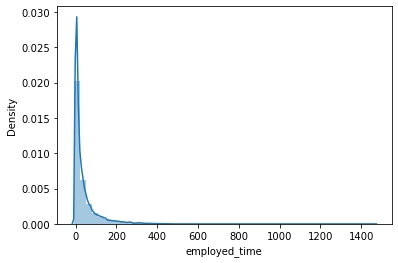

In [102]:
sns.distplot(spec['employed_time'])

In [103]:
employed_time_max = spec[(spec['employed_time'] > 480)]

employed_time_max_index = employed_time_max.index

employed_time_max.loc[employed_time_max_index , ['employed_time']] = 0


###신뢰할 수 없는 자료라 판단되어 최대치 조정보다는 0으로 메꿈.###

In [104]:
employed_time_min = spec[(spec['employed_time'] < 0)]

employed_time_min_index = employed_time_min.index

employed_time_min.loc[employed_time_min_index , ['employed_time']] = 0

###신뢰할 수 없는 자료라 판단되어 최소값 조정보다는 0으로 메꿈.###

In [105]:
spec = spec.reset_index(drop = True)

### company_enter_month 제거

In [106]:
spec = spec.drop(['company_enter_month'], axis=1)

In [107]:
spec.isnull().sum()

application_id           0
user_id                  0
insert_time              0
credit_score         87521
yearly_income            0
income_type              0
employment_type          0
houseown_type            0
desired_amount           0
purpose                  0
existing_loan_cnt        0
existing_loan_amt        0
Month                    0
app_count                0
birth_year            9723
gender                   0
rehab_group              0
employed_time            0
dtype: int64

# credit_score결측치 보간(KNN-imputer)(아직 안함)

In [108]:
spec_1 = spec.copy()

In [109]:
from sklearn.impute import KNNImputer

In [110]:
spec_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394126 entries, 0 to 1394125
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   application_id     1394126 non-null  int64         
 1   user_id            1394126 non-null  int64         
 2   insert_time        1394126 non-null  datetime64[ns]
 3   credit_score       1306605 non-null  float64       
 4   yearly_income      1394126 non-null  float64       
 5   income_type        1394126 non-null  object        
 6   employment_type    1394126 non-null  object        
 7   houseown_type      1394126 non-null  object        
 8   desired_amount     1394126 non-null  float64       
 9   purpose            1394126 non-null  object        
 10  existing_loan_cnt  1394126 non-null  float64       
 11  existing_loan_amt  1394126 non-null  float64       
 12  Month              1394126 non-null  object        
 13  app_count          1394126 

In [111]:
spec_1 = spec_1.drop(['application_id', 'user_id'], axis=1)

In [112]:
spec_1 = spec_1.drop(['insert_time'], axis=1)

In [113]:
spec_1['yearly_income'] = np.log1p(spec_1['yearly_income'])
spec_1['desired_amount'] = np.log1p(spec_1['desired_amount'])
spec_1['existing_loan_cnt'] = np.log1p(spec_1['existing_loan_cnt'])
spec_1['existing_loan_amt'] = np.log1p(spec_1['existing_loan_amt'])

In [114]:
spec_credit = spec_1[['credit_score', 'birth_year']]
spec_str = spec_1.drop(['yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'credit_score', 'employed_time', 'birth_year'], axis=1)
spec_int = spec_1[['yearly_income', 'desired_amount', 'existing_loan_cnt', 'existing_loan_amt', 'employed_time']]

In [115]:
spec_credit

,credit_score,birth_year
0,580.00000,1974.00000
1,740.00000,1997.00000
2,580.00000,1997.00000
3,540.00000,1978.00000
4,550.00000,1986.00000
...,...,...
1394121,690.00000,1989.00000
1394122,630.00000,1958.00000
1394123,690.00000,1979.00000
1394124,680.00000,1994.00000


In [116]:
spec_str = pd.get_dummies(spec_str, drop_first = True)

In [117]:
spec_str

,app_count,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,income_type_PRIVATEBUSINESS,employment_type_계약직,employment_type_일용직,employment_type_정규직,houseown_type_배우자,...,purpose_LIVING,purpose_SWITCHLOAN,Month_04,Month_05,Month_06,gender_M,gender_U,rehab_group_B,rehab_group_C,rehab_group_D
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,17,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1394122,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1394123,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0
1394124,3,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0


In [118]:
spec_str.isnull().sum()

app_count                      0
income_type_EARNEDINCOME2      0
income_type_FREELANCER         0
income_type_OTHERINCOME        0
income_type_PRACTITIONER       0
income_type_PRIVATEBUSINESS    0
employment_type_계약직            0
employment_type_일용직            0
employment_type_정규직            0
houseown_type_배우자              0
houseown_type_자가               0
houseown_type_전월세              0
purpose_BUYCAR                 0
purpose_BUYHOUSE               0
purpose_ETC                    0
purpose_HOUSEDEPOSIT           0
purpose_INVEST                 0
purpose_LIVING                 0
purpose_SWITCHLOAN             0
Month_04                       0
Month_05                       0
Month_06                       0
gender_M                       0
gender_U                       0
rehab_group_B                  0
rehab_group_C                  0
rehab_group_D                  0
dtype: int64

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler_ = MinMaxScaler()
scaler_.fit(spec_int)
scaled_spec_int = scaler_.transform(spec_int)
scaled_spec_int = pd.DataFrame(data = scaled_spec_int, columns = spec_int.columns)

In [121]:
scaled_spec_int

,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,employed_time
0,0.69031,0.60000,0.28581,0.73094,0.00408
1,0.70792,0.64771,0.24618,0.70494,0.00476
2,0.70792,0.64771,0.36927,0.75271,0.01293
3,0.74771,0.64771,0.34556,0.76422,0.00544
4,0.77782,0.64771,0.31818,0.81646,0.09184
...,...,...,...,...,...
1394121,0.75798,0.76532,0.19509,0.83598,0.00408
1394122,0.73802,0.70000,0.31818,0.72123,0.02721
1394123,0.79542,0.77782,0.19509,0.71843,0.16122
1394124,0.76021,0.73010,0.19509,0.75768,0.00476


In [122]:
spec_1 = pd.concat([scaled_spec_int, spec_str, spec_credit], axis=1)

In [123]:
spec_1

,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,employed_time,app_count,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,...,Month_04,Month_05,Month_06,gender_M,gender_U,rehab_group_B,rehab_group_C,rehab_group_D,credit_score,birth_year
0,0.69031,0.60000,0.28581,0.73094,0.00408,1,0,0,1,0,...,0,0,0,1,0,0,0,1,580.00000,1974.00000
1,0.70792,0.64771,0.24618,0.70494,0.00476,1,0,1,0,0,...,0,0,0,1,0,0,0,1,740.00000,1997.00000
2,0.70792,0.64771,0.36927,0.75271,0.01293,1,0,1,0,0,...,0,0,0,1,0,0,0,1,580.00000,1997.00000
3,0.74771,0.64771,0.34556,0.76422,0.00544,1,0,0,0,0,...,0,0,0,0,0,0,0,1,540.00000,1978.00000
4,0.77782,0.64771,0.31818,0.81646,0.09184,1,0,0,0,0,...,0,0,0,1,0,0,0,1,550.00000,1986.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,0.75798,0.76532,0.19509,0.83598,0.00408,17,0,0,0,0,...,0,0,1,1,0,0,0,0,690.00000,1989.00000
1394122,0.73802,0.70000,0.31818,0.72123,0.02721,2,0,0,0,0,...,0,0,1,0,0,0,0,0,630.00000,1958.00000
1394123,0.79542,0.77782,0.19509,0.71843,0.16122,1,0,0,0,1,...,0,0,1,1,0,0,0,0,690.00000,1979.00000
1394124,0.76021,0.73010,0.19509,0.75768,0.00476,3,0,0,0,0,...,0,0,1,1,0,1,0,0,680.00000,1994.00000


In [124]:
#임퓨터 선언(3개의 평균으로 계산하겠다)
imputer=KNNImputer(n_neighbors=3)

#임퓨터를 사용하여 filled_train으로 저장 이후 같은 임퓨터를 사용할때는 imputer.transform()으로 사용하면됨
filled_spec_1=imputer.fit_transform(spec_1)

#사용하면 array값으로 나오기때문에 dataframe으로 바꿔주고 컬럼을가져옴
filled_spec_1=pd.DataFrame(filled_spec_1, columns=spec_1.columns)

In [125]:
filled_spec_1.isnull().sum()

yearly_income                  0
desired_amount                 0
existing_loan_cnt              0
existing_loan_amt              0
employed_time                  0
app_count                      0
income_type_EARNEDINCOME2      0
income_type_FREELANCER         0
income_type_OTHERINCOME        0
income_type_PRACTITIONER       0
income_type_PRIVATEBUSINESS    0
employment_type_계약직            0
employment_type_일용직            0
employment_type_정규직            0
houseown_type_배우자              0
houseown_type_자가               0
houseown_type_전월세              0
purpose_BUYCAR                 0
purpose_BUYHOUSE               0
purpose_ETC                    0
purpose_HOUSEDEPOSIT           0
purpose_INVEST                 0
purpose_LIVING                 0
purpose_SWITCHLOAN             0
Month_04                       0
Month_05                       0
Month_06                       0
gender_M                       0
gender_U                       0
rehab_group_B                  0
rehab_grou

In [126]:
filled_spec_1

,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,employed_time,app_count,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,...,Month_04,Month_05,Month_06,gender_M,gender_U,rehab_group_B,rehab_group_C,rehab_group_D,credit_score,birth_year
0,0.69031,0.60000,0.28581,0.73094,0.00408,1.00000,0.00000,0.00000,1.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,580.00000,1974.00000
1,0.70792,0.64771,0.24618,0.70494,0.00476,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,740.00000,1997.00000
2,0.70792,0.64771,0.36927,0.75271,0.01293,1.00000,0.00000,1.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,580.00000,1997.00000
3,0.74771,0.64771,0.34556,0.76422,0.00544,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,540.00000,1978.00000
4,0.77782,0.64771,0.31818,0.81646,0.09184,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,550.00000,1986.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,0.75798,0.76532,0.19509,0.83598,0.00408,17.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,690.00000,1989.00000
1394122,0.73802,0.70000,0.31818,0.72123,0.02721,2.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,630.00000,1958.00000
1394123,0.79542,0.77782,0.19509,0.71843,0.16122,1.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,690.00000,1979.00000
1394124,0.76021,0.73010,0.19509,0.75768,0.00476,3.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,680.00000,1994.00000


In [127]:
spec

,application_id,user_id,insert_time,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,existing_loan_cnt,existing_loan_amt,Month,app_count,birth_year,gender,rehab_group,employed_time
0,566528,681184,2022-03-01,580.00000,8000000.00000,OTHERINCOME,ETC,전월세,1000000.00000,LIVING,4.00000,20000000.00000,03,1,1974.00000,M,D,0
1,180433,623737,2022-03-01,740.00000,12000000.00000,FREELANCER,일용직,기타가족소유,3000000.00000,LIVING,3.00000,11000000.00000,03,1,1997.00000,M,D,1
2,1657888,752985,2022-03-01,580.00000,12000000.00000,FREELANCER,ETC,기타가족소유,3000000.00000,LIVING,7.00000,33000000.00000,03,1,1997.00000,M,D,13
3,672433,231989,2022-03-01,540.00000,30000000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,6.00000,43000000.00000,03,1,1978.00000,F,D,2
4,2136071,622446,2022-03-01,550.00000,60000000.00000,EARNEDINCOME,정규직,전월세,3000000.00000,LIVING,5.00000,143000000.00000,03,1,1986.00000,M,D,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394121,717881,649046,2022-06-01,690.00000,38000000.00000,EARNEDINCOME,정규직,전월세,45000000.00000,SWITCHLOAN,2.00000,224000000.00000,06,17,1989.00000,M,A,0
1394122,118253,668486,2022-06-01,630.00000,24000000.00000,PRIVATEBUSINESS,ETC,기타가족소유,10000000.00000,LIVING,5.00000,16000000.00000,06,2,1958.00000,F,A,34
1394123,725612,361690,2022-06-01,690.00000,90000000.00000,PRACTITIONER,정규직,전월세,60000000.00000,SWITCHLOAN,2.00000,15000000.00000,06,1,1979.00000,M,A,231
1394124,1662439,258755,2022-06-01,680.00000,40000000.00000,PRIVATEBUSINESS,ETC,전월세,20000000.00000,SWITCHLOAN,2.00000,37000000.00000,06,3,1994.00000,M,B,1


<AxesSubplot:xlabel='credit_score', ylabel='Density'>

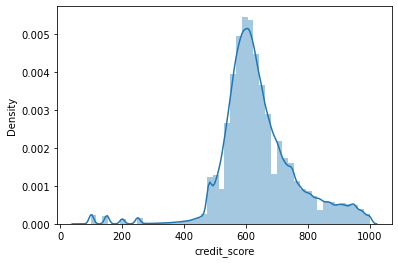

In [128]:
sns.distplot(filled_spec_1['credit_score'])

In [129]:
filled_spec_1.describe()

,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,employed_time,app_count,income_type_EARNEDINCOME2,income_type_FREELANCER,income_type_OTHERINCOME,income_type_PRACTITIONER,...,Month_04,Month_05,Month_06,gender_M,gender_U,rehab_group_B,rehab_group_C,rehab_group_D,credit_score,birth_year
count,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,...,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000
mean,0.74292,0.70700,0.23704,0.64836,0.03038,7.15259,0.05653,0.07454,0.12380,0.01444,...,0.24358,0.26151,0.26164,0.67158,0.00697,0.13593,0.00097,0.42132,640.50549,1983.27693
std,0.08917,0.06552,0.13904,0.27316,0.04082,17.39415,0.23094,0.26264,0.32936,0.11928,...,0.42925,0.43946,0.43953,0.46964,0.08322,0.34272,0.03113,0.49377,124.57893,10.66358
min,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,60.00000,1927.00000
25%,0.73979,0.66990,0.12309,0.70494,0.00680,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,570.00000,1976.00000
50%,0.75315,0.70000,0.24618,0.75434,0.01429,3.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,620.00000,1984.00000
75%,0.76812,0.74771,0.34556,0.78478,0.03537,7.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,700.00000,1992.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,840.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1000.00000,2008.00000


In [130]:
spec.describe()

,application_id,user_id,credit_score,yearly_income,desired_amount,existing_loan_cnt,existing_loan_amt,app_count,birth_year,employed_time
count,1394126.00000,1394126.00000,1306605.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1394126.00000,1384403.00000,1394126.00000
mean,1084043.82553,439569.93477,638.59087,43453258.88765,30407345.53405,4.06819,58410717.79595,7.15259,1983.28015,38.66371
std,625899.71063,253842.51691,125.07486,120840116.35312,185169050.86265,4.33707,105498881.83192,17.39415,10.67735,60.01085
min,1.00000,1.00000,60.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1927.00000,-6.00000
25%,541713.25000,220350.25000,570.00000,25000000.00000,5000000.00000,1.00000,11000000.00000,1.00000,1976.00000,4.00000
50%,1084261.50000,439983.00000,620.00000,34000000.00000,10000000.00000,3.00000,34265000.00000,3.00000,1984.00000,15.00000
75%,1625895.75000,659004.00000,690.00000,48000000.00000,30000000.00000,6.00000,69000000.00000,7.00000,1992.00000,46.00000
max,2167826.00000,879697.00000,1000.00000,10000000000.00000,10000000000.00000,278.00000,9741050000.00000,840.00000,2008.00000,1464.00000


In [131]:
spec['credit_score'] = filled_spec_1['credit_score']

In [132]:
spec['birth_year'] = filled_spec_1['birth_year']

In [133]:
spec.to_csv('c:/data/spec.csv', encoding = 'cp949', index = False)